<a href="https://colab.research.google.com/github/AlessandroEspinosa2003/FishData/blob/SeanBranch/DataProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

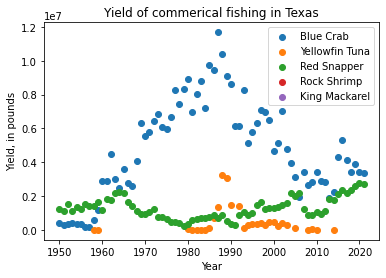

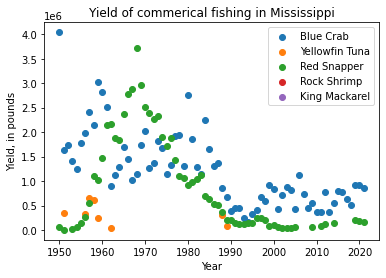

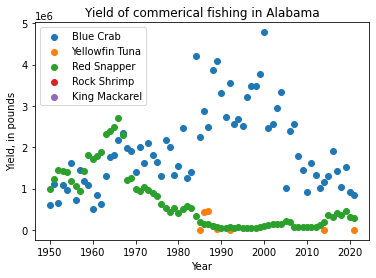

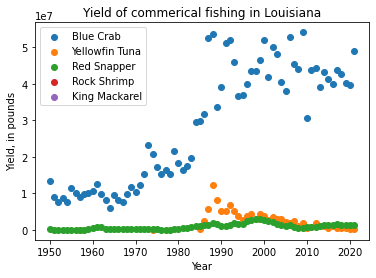

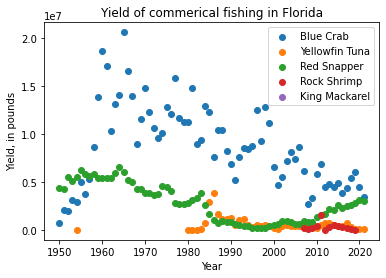

array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005.])

In [49]:
from ast import Lambda
import numpy as np
import pandas as pd
import flask
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data set from the special file.
data = np.load('FishData.txt.npy')

# Test: Did everything load?
data

# Separate the data by species. Each new array should only contain data
# about the particular species.
species = ['CRAB, BLUE', 'TUNA, YELLOWFIN', 'SNAPPER, RED', 'SHRIMP, ROCK',
           'MACKAREL, KING']

# These return the rows containing the indicated species.
crab = np.where(data[:, 2] == species[0])
tuna = np.where(data[:, 2] == species[1])
snap = np.where(data[:, 2] == species[2])
shrimp = np.where(data[:, 2] == species[3])
mack = np.where(data[:, 2] == species[4])

# Now separate.
crab_data = data[crab, :]
tuna_data = data[tuna, :]
snap_data = data[snap, :]
shrimp_data = data[shrimp, :]
mack_data = data[mack, :]

# These are the rows that correspond to an animal being fished in
# that state.
TX = [np.where((data[:, 1] == 'TEXAS') & (data[:, 2] == species[j]))
for j in range(0, 5)]

MS = [np.where((data[:, 1] == 'MISSISSIPPI') & (data[:, 2] == species[j]))
for j in range(0, 5)]

AL = [np.where((data[:, 1] == 'ALABAMA') & (data[:, 2] == species[j]))
for j in range(0, 5)]

LA = [np.where((data[:, 1] == 'LOUISIANA') & (data[:, 2] == species[j]))
for j in range(0, 5)]

FL = [np.where((data[:, 1] == 'FLORIDA-WEST') & (data[:, 2] == species[j]))
for j in range(0, 5)]

np.array(data[TX[0], 0], dtype = int)
np.array(data[TX[0], 3], dtype = int)

# Variable for labels.
species_labels = ['Blue Crab', 'Yellowfin Tuna', 'Red Snapper', 'Rock Shrimp',
                  'King Mackarel']

# Labels.
xlab = 'Year'
ylab = 'Yield, in pounds'

# Plot the counts.
# First, for Texas.
fig1 = plt.figure()
ax1 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[TX[k], 0], dtype = int), 
         np.array(data[TX[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Texas')
# ax1.ticklabel_format(style = 'plain')
plt.show()

# Other states follow.
fig2 = plt.figure()
ax2 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[MS[k], 0], dtype = int), 
         np.array(data[MS[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Mississippi')
# ax2.ticklabel_format(style = 'plain')
plt.show()

fig3 = plt.figure()
ax3 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[AL[k], 0], dtype = int), 
         np.array(data[AL[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Alabama')
# ax3.ticklabel_format(style = 'plain')
plt.show()

fig4 = plt.figure()
ax4 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[LA[k], 0], dtype = int), 
         np.array(data[LA[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Louisiana')
# ax4.ticklabel_format(style = 'plain')
plt.show()

fig5 = plt.figure()
ax5 = fig1.add_subplot()
for k in range(0, 5):
  plt.scatter(np.array(data[FL[k], 0], dtype = int), 
         np.array(data[FL[k], 3], dtype = int),
         label = species_labels[k])
  
plt.legend(loc = 'best')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Yield of commerical fishing in Florida')
# ax5.ticklabel_format(style = 'plain')
plt.show()

# As not all species are represented equally in each split,
# we aim to train a few time series models (likely ARIMA) to
# forecast future yields for blue crab and red snapper.

# We first split the data into a training set and a testing
# set. Train up to 2005, and test afterwards.
train = np.array(np.linspace(0, 55, 56), dtype = int)
test = np.array(np.linspace(56, 71, 16), dtype = int)

# Gather training data.
TX_crab_train = data[TX[0], 3][:, train]
TX_snap_train = data[TX[2], 3][:, train]

MS_crab_train = data[MS[0], 3][:, train]
MS_snap_train = data[MS[2], 3][:, train]

AL_crab_train = data[AL[0], 3][:, train]
AL_snap_train = data[AL[2], 3][:, train]

LA_crab_train = data[LA[0], 3][:, train]
LA_snap_train = data[LA[2], 3][:, train]

FL_crab_train = data[FL[0], 3][:, train]
FL_snap_train = data[FL[2], 3][:, train]

# And now the testing data.
TX_crab_test = data[TX[0], 3][:, test]
TX_snap_test = data[TX[2], 3][:, test]

MS_crab_test = data[MS[0], 3][:, test]
MS_snap_test = data[MS[2], 3][:, test]

AL_crab_test = data[AL[0], 3][:, test]
AL_snap_test = data[AL[2], 3][:, test]

LA_crab_test = data[LA[0], 3][:, test]
LA_snap_test = data[LA[2], 3][:, test]

FL_crab_test = data[FL[0], 3][:, test]
FL_snap_test = data[FL[2], 3][:, test]